In [1]:
# linear regression Boston house price

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [26]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.datasets import load_boston
boston=load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
data=pd.DataFrame(boston.data,columns=boston.feature_names);data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
data['PRICE']=boston.target;data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.shape

(506, 14)

In [12]:
data.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   

In [13]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [15]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [18]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [20]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [21]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
corr=data.corr()

In [23]:
corr.shape

(14, 14)

In [24]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

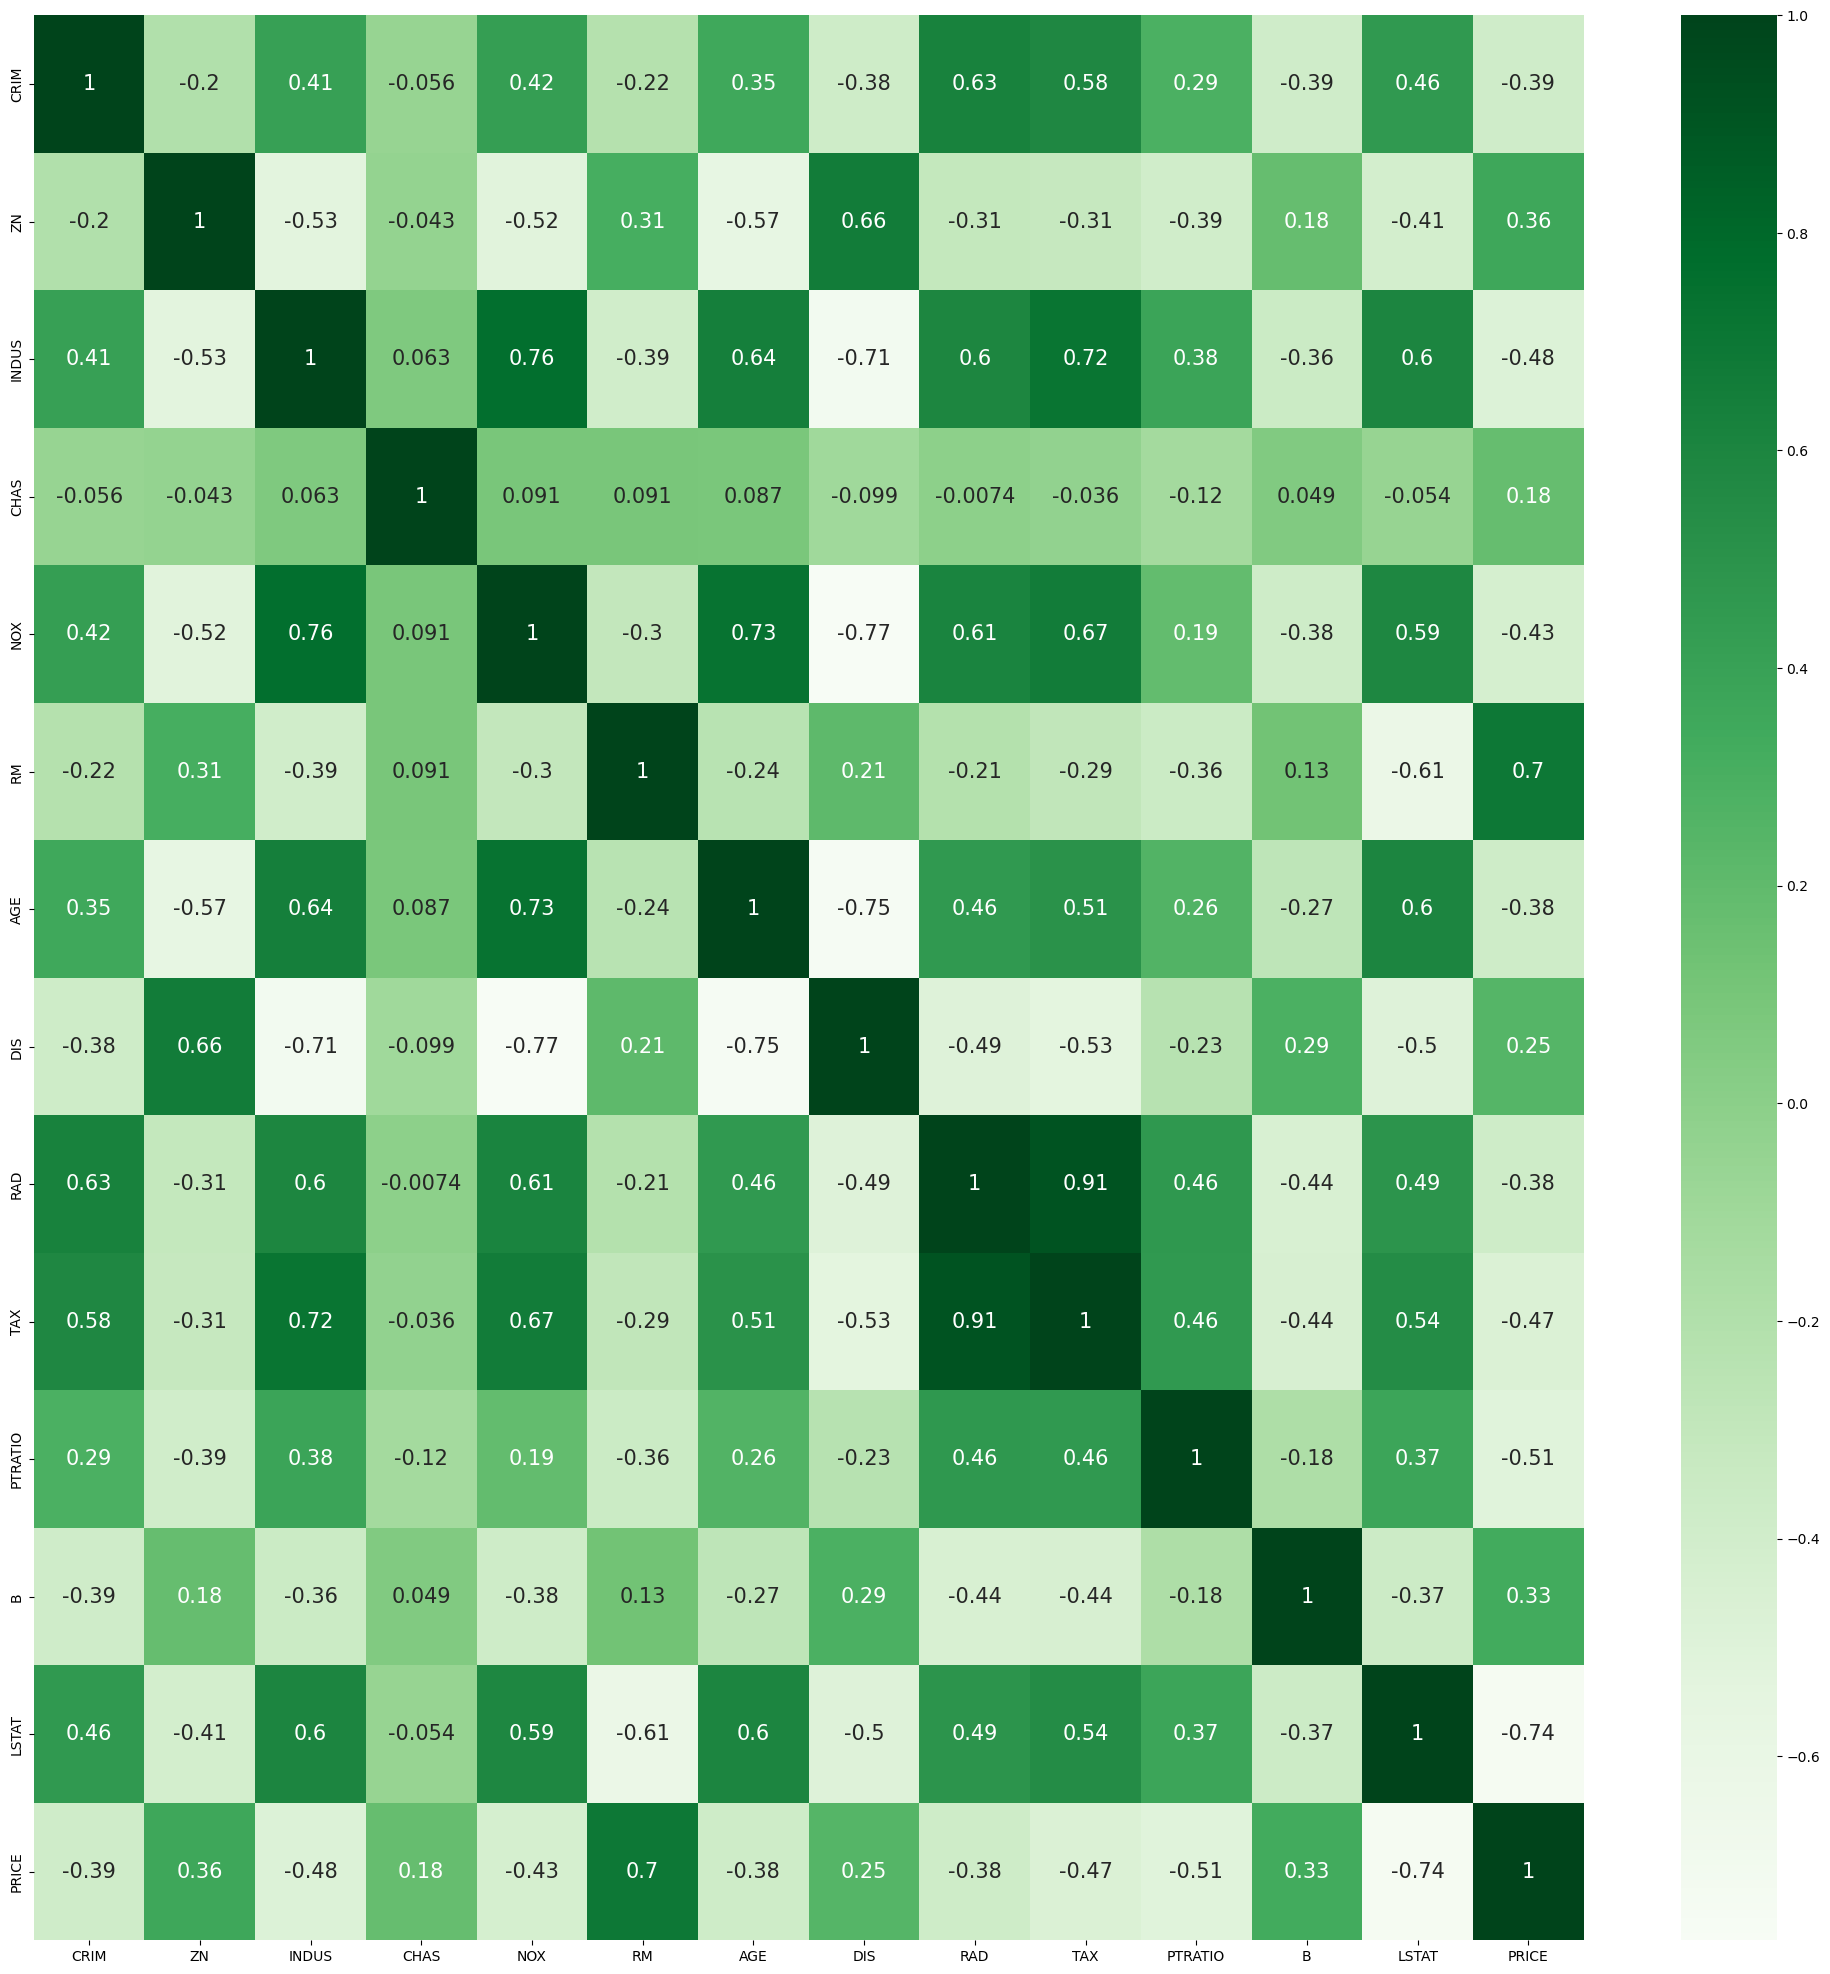

In [30]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,cbar=True,annot=True,annot_kws={'size':15},cmap='Greens')

In [33]:
# simple regression
x=data[['RM']]
y=data['PRICE']

In [34]:
x


,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [35]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [38]:
#linear regression
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [39]:
slr.intercept_

-33.850046070500014

In [41]:
slr.coef_

array([8.96006106])

In [53]:
y_pred=slr.predict(x_test)


In [55]:
# model evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


R^2: 0.5065734010320511
MAE 4.853146476052217
MSE 51.523641130023584
RMSE 7.177997013793164


Text(0.5, 1.0, 'prices vs pridiceted')

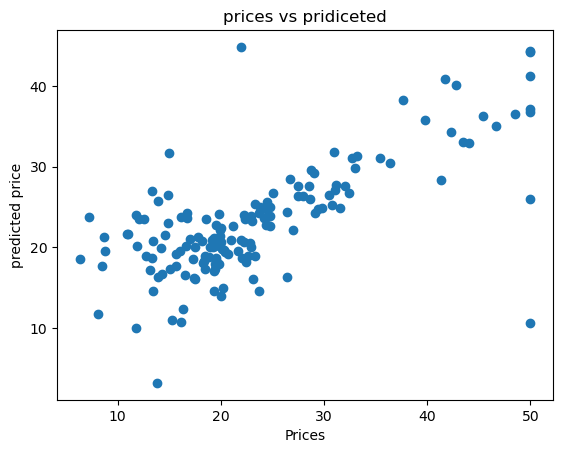

In [66]:
# visualization evaluation

plt.scatter(y_test,y_pred)
plt.xlabel("Prices")
plt.ylabel("predicted price")
plt.title("prices vs pridiceted")

(array([ 1., 13., 13., 73., 38., 12.,  0.,  1.,  0.,  1.]),
 array([-22.91929004, -16.69550678, -10.47172351,  -4.24794025,
          1.97584301,   8.19962628,  14.42340954,  20.64719281,
         26.87097607,  33.09475934,  39.3185426 ]),
 <BarContainer object of 10 artists>)

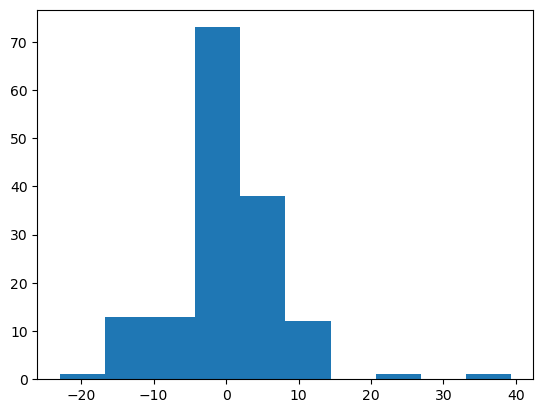

In [60]:
plt.hist(y_test-y_pred)


In [48]:
# multiple linear regression

In [67]:
# simple regression
x=data.drop(['PRICE'],axis=1)
y=data['PRICE']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [69]:
#linear regression
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [70]:
slr.intercept_

36.357041376595205

In [71]:
slr.coef_

array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
       -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
        3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
       -5.23477529e-01])

In [72]:
y_pred=slr.predict(x_test)


In [73]:
# model evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


R^2: 0.7121818377409195
MAE 3.8590055923707407
MSE 30.053993307124127
RMSE 5.482152251362974


Text(0.5, 1.0, 'prices vs pridiceted')

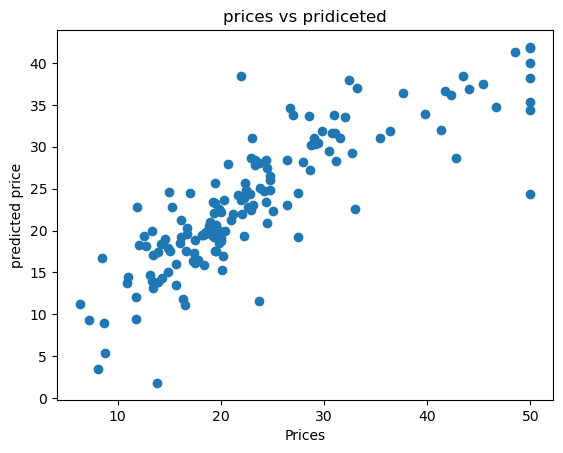

In [74]:
# visualization evaluation

plt.scatter(y_test,y_pred)
plt.xlabel("Prices")
plt.ylabel("predicted price")
plt.title("prices vs pridiceted")

(array([ 1.,  3., 23., 70., 31., 13.,  7.,  3.,  0.,  1.]),
 array([-16.53943954, -12.3273208 ,  -8.11520206,  -3.90308332,
          0.30903542,   4.52115416,   8.73327291,  12.94539165,
         17.15751039,  21.36962913,  25.58174787]),
 <BarContainer object of 10 artists>)

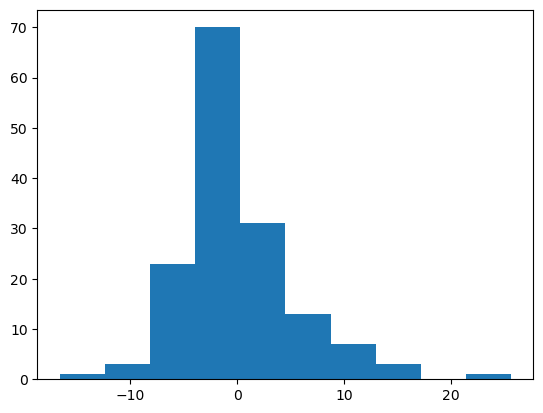

In [75]:
plt.hist(y_test-y_pred)


In [76]:
# polynominal regression

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
poly_features=PolynomialFeatures(degree=2)
x_train_quadratic=poly_features.fit_transform(x_train)
quadratic=LinearRegression()
quadratic.fit(x_train_quadratic,y_train)
y_train_predict=quadratic.predict(x_train_quadratic)
y_test_prediction=quadratic.predict(poly_features.fit_transform(x_test))

In [107]:
print('R^2:',metrics.r2_score(y_test,y_test_prediction))
print('MAE',metrics.mean_absolute_error(y_test,y_test_prediction))
print('MSE',metrics.mean_squared_error(y_test,y_test_prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_prediction)))

R^2: 0.8581336375445239
MAE 2.6331990616032597
MSE 14.813695821964796
RMSE 3.8488564304173254


In [108]:
poly_features=PolynomialFeatures(degree=3)
x_train_cubic=poly_features.fit_transform(x_train)
cubic=LinearRegression()
cubic.fit(x_train_cubic,y_train)
y_train_predict=cubic.predict(x_train_cubic)
y_test_prediction=cubic.predict(poly_features.fit_transform(x_test))

In [109]:
print('R^2:',metrics.r2_score(y_test,y_test_prediction))
print('MAE',metrics.mean_absolute_error(y_test,y_test_prediction))
print('MSE',metrics.mean_squared_error(y_test,y_test_prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_prediction)))

R^2: -119.09587617295392
MAE 62.752163027560194
MSE 12540.42007073267
RMSE 111.98401703248848
